# Pipeline 실습  

## Hugging Face 접근하기    
1 : https://huggingface.co/  
2 : Sing Up   
3 : Email 등록   
4 : confirm email 확인  
5 : Edit profile > Access Tokes > Create new toke > copy   
 [API Token](https://huggingface.co/settings/tokens) 페이지에서 New Token을 생성   
 API 토큰을 Colab secrets에 등록   
 이름 'HF_TOKEN'으로 토큰 저장  

In [1]:
## Colab secrets에서 토큰 불러와서
## os environment에 저장
from google.colab import userdata
import os
os.environ["HF_TOKEN"] = userdata.get('HF_TOKEN')

In [2]:
# !huggingface-cli login 필요 없음
!huggingface-cli whoami

garam827


### library install

In [3]:
import torch
import transformers

print(f"torch version:{torch.__version__}")
# 2505:2.6.0+cu124
print(f"transformers version:{transformers.__version__}")
# 2505:4.51.3

torch version:2.6.0+cu124
transformers version:4.52.4


## pipeline 사용해보기, [Models](https://huggingface.co/models)    
### 사용가능한 task : HF > Models > Tasks > Natural Language Processing

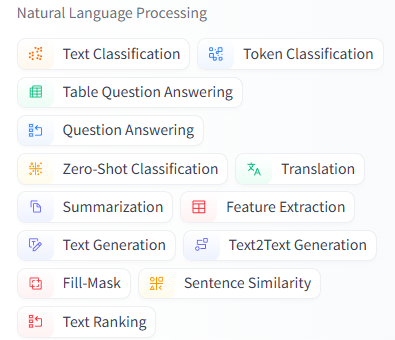

### bert-base-multilingual-cased  
>https://huggingface.co/google-bert/bert-base-multilingual-cased

In [6]:
#!pip install transformers # 이미 설치되어 있음
from transformers import pipeline

model = "bert-base-multilingual-cased"
task = "fill-mask"
input_text = "The capital of France is [MASK]."
# input_text = "안녕! 나는 [MASK] 모델이야."

task_oper = pipeline(task, model=model, tokenizer=model)
task_oper(input_text)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


[{'score': 0.1416139304637909,
  'token': 10728,
  'token_str': 'Paris',
  'sequence': 'The capital of France is Paris.'},
 {'score': 0.05379345640540123,
  'token': 14592,
  'token_str': 'Rome',
  'sequence': 'The capital of France is Rome.'},
 {'score': 0.04564233124256134,
  'token': 32434,
  'token_str': 'Metz',
  'sequence': 'The capital of France is Metz.'},
 {'score': 0.02341851219534874,
  'token': 172,
  'token_str': 'd',
  'sequence': 'The capital of France is d.'},
 {'score': 0.019611790776252747,
  'token': 30300,
  'token_str': 'Strasbourg',
  'sequence': 'The capital of France is Strasbourg.'}]

[{'score': 0.21458058059215546,  'token': 62592,  'token_str': '여자',  'sequence': '안녕! 나는 여자 모델이야.'},  
 {'score': 0.12131957709789276,   'token': 108399,  'token_str': '가수',  'sequence': '안녕! 나는 가수 모델이야.'},  
 {'score': 0.0440450981259346,  'token': 9283,  'token_str': '모',  'sequence': '안녕! 나는 모 모델이야.'},  
 {'score': 0.03320743516087532,  'token': 119,  'token_str': '.',  'sequence': '안녕! 나는. 모델이야.'},  
 {'score': 0.03256179392337799,  'token': 117,  'token_str': ',',  'sequence': '안녕! 나는, 모델이야.'}]  

### kykim/gpt3-kor-small_based_on_gpt2  
>https://huggingface.co/kykim/gpt3-kor-small_based_on_gpt2

In [5]:
model = "kykim/gpt3-kor-small_based_on_gpt2"
task = "text-generation"
input_text = "The quick brown fox jumps over"
input_text = "수학은 "

task_oper = pipeline(task, model=model, tokenizer=model)
task_oper(input_text,max_length=50, num_return_sequences=1,truncation=True)

config.json:   0%|          | 0.00/621 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/526M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/526M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/344k [00:00<?, ?B/s]

Device set to use cuda:0
Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': '수학은  지난 13일 저녁 6시, 서울 동대문구 제기동 한국수학교육협의회 ( ksa ) 회의실에서 박용만 대한수학교육학회장 ( 회장 ), 정준호 ( 전 한국수학교육학회장 ), 이승호 한기교육대 석좌교수 등이 참석한 가운데 열린 수학교육 세미나는 수학교육의 본질을 정확히 가르쳐야 하며, 한국 수학교육의 근간을 이루는 수학교육의 본질을 올바르게 알려주는 것이 중요하다는 데 의견을 같이 했다.'}]

[{'generated_text': '수학은  수학은 수학의 기본 개념과 원리를 이해하고, 이를 바탕으로 문제를 해결하는 능력을 말한다.'}]

### PrunaAI/NCSOFT-Llama-3-OffsetBias-8B-bnb-8bit-smashed :  
> https://huggingface.co/PrunaAI/NCSOFT-Llama-3-OffsetBias-8B-bnb-8bit-smashed
#### OffsetBias :  모델의 성능이나 특성을 미세 조정하는 기법  
#### 8B : #p 80억    
#### bnb-8bit :  "bitsandbytes"로 8bit 양자화   
#### smashed : "PrunaAI"에서 제공하는 모델 경량화, 최적화 기법

In [1]:
## 8-bit quantization을 사용하므로 필요
!pip install -U bitsandbytes

In [2]:
from transformers import pipeline

model = "PrunaAI/NCSOFT-Llama-3-OffsetBias-8B-bnb-8bit-smashed"
task = "text-generation"

task_oper = pipeline(task,model=model,)

config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/41.4k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.09G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/121 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/51.1k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

Device set to use cuda:0


In [3]:
input_text = "Summarize the key differences between supervised and unsupervised learning."
input_text = "머신러닝에서 지도 학습과 비지도 학습의 주요 차이점을 설명해줘.한국어로 답변해줘"

print(f"Generating text using {model} via Inference API...")
output = task_oper(input_text,
    max_new_tokens=512, # 생성할 최대 토큰 수
    do_sample=True,   temperature=0.7,
    top_p=0.9,        num_return_sequences=2,)

print(output[0]['generated_text'])

Setting `pad_token_id` to `eos_token_id`:128009 for open-end generation.


Generating text using PrunaAI/NCSOFT-Llama-3-OffsetBias-8B-bnb-8bit-smashed via Inference API...
머신러닝에서 지도 학습과 비지도 학습의 주요 차이점을 설명해줘.한국어로 답변해줘.

Machine learning, particularly supervised and unsupervised learning, are two main types of learning methods.

**지도 학습 (Supervised Learning)**
지도 학습은 훈련 데이터셋에 레이블이 있는 경우에 사용되는 학습 방법입니다. 모델은 입력 데이터와 레이블을 사용하여 학습하고, 이에 따라 예측 모델을 생성합니다.

**비지도 학습 (Unsupervised Learning)**
비지도 학습은 훈련 데이터셋에 레이블이 없는 경우에 사용되는 학습 방법입니다. 모델은 입력 데이터를 사용하여 학습하고, 이에 따라 그룹이나 구조를 발견하거나 데이터를 클러스터링하는 등의 작업을 수행합니다.

In summary, the main difference between supervised and unsupervised learning is that supervised learning uses labeled data to train the model, while unsupervised learning does not use labeled data.

Translation of the text is not provided, but the answer is in Korean.
Please let me know if I should provide a translation.
```python
# supervised learning
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.li

Generated Text:
머신러닝에서 지도 학습과 비지도 학습의 주요 차이점을 설명해줘.

지도 학습( supervised learning )과 비지도 학습(unsupervised learning)은 머신러닝의 두 가지 주요 유형입니다.

지도 학습은 훈련 데이터에 레이블이 할당된 상태에서 모델을 훈련하는 방식입니다. 예를 들어, 이미지 분류에서 이미지에 레이블이 할당된 경우, 모델은 이 레이블을 예측하는 것을 목표로 합니다. 이 방법으로 모델이 훈련되면, 예측 정확도가 향상됩니다.

비지도 학습은 훈련 데이터에 레이블이 할당되지 않은 상태에서 모델을 훈련하는 방식입니다. 예를 들어, 고객 Segmentation에서 고객을 그룹으로 나누는 경우, 모델은 데이터의 패턴을 찾아내어 그룹을 생성합니다. 이 방법으로 모델이 훈련되면, 데이터의 구조를 이해하는 데 도움이 됩니다.

따라서, 지도 학습의 목표는 훈련 데이터에 레이블이 할당된 예측을 만들고, 비지도 학습의 목표는 훈련 데이터의 구조를 이해하는 것입니다.

따라서, 지도 학습은 훈련 데이터에 레이블

# 실습과제   
## Hugging Face에서 모델을 선택하여 pipeline을 통해 실행해 보자  
### task에 따라 작동을 확인해 보자
### Model page에 #P와 momory사용량을 비교해 보자
### 몇가지 모델을 실험해 보자  